In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
N, D = 800, 28*28
with open('a012_images.dat', 'rb') as fid:
    X = np.fromfile(fid, np.uint8).reshape(N, D)

In [15]:
def plot_digit(X):
    plt.imshow(X.reshape(28, 28).T, cmap=plt.cm.Greys)
    plt.show()

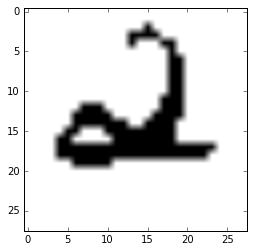

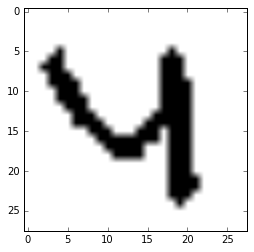

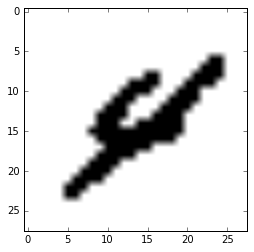

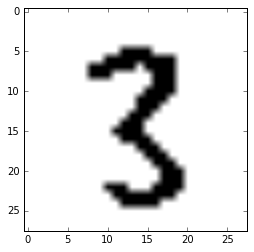

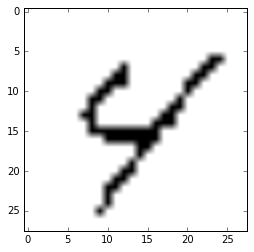

In [19]:
for i in np.random.choice(N, size=5):
    plot_digit(X[i])

In [46]:
from numpy.core.umath_tests import matrix_multiply as mm

def EM(X, K=4, max_iter=100, tol=0.01):
    # Initialize variables
    N, D = X.shape
    pis = np.ones(K) / K
    mus = np.random.uniform(0.25, 0.75, size=(K, D))
    
    prev_llh = 0
    for i in range(max_iter):
        # E step
        resps = np.zeros((K, N)) # responsibilities
        for k in range(K):
            resps[k] = pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
        resps /= resps.sum(axis=0)
        
        # M step
        Nks = resps.sum(axis=1)[:, np.newaxis]
        mus = np.dot(resps, X) / Nks # Calculate new mus
        pis = Nks / N
        
        # Evaluate log likelihood
        llh = 0
        for k in range(K):
            llh += pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
        llh = np.log(llh).sum()
        print('Iteration: %d, likelihood %.4f' % (i, llh))
        
        # Plot the means
        _, axs = plt.subplots(1, K)
        for mu, ax in zip(mus, axs):
            ax.imshow(mu.reshape(28, 28).T, cmap=plt.cm.Greys, vmin=0, vmax=1)
        
        if np.abs(llh - prev_llh) < tol:
            # Break if the log-likelihood hasn't improved much
            plt.savefig('means.png', bbox_inches='tight', dpi=300)
            break
        prev_llh = llh
        plt.show()
    
    return pis, mus

Iteration: 0, likelihood -155086.6763


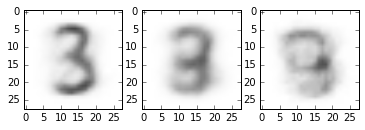

Iteration: 1, likelihood -148009.0912


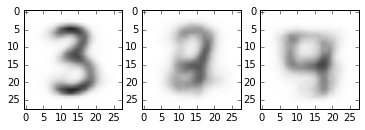

Iteration: 2, likelihood -145949.3941


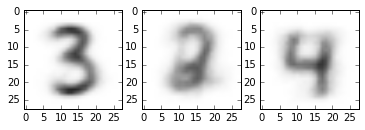

Iteration: 3, likelihood -144804.5951


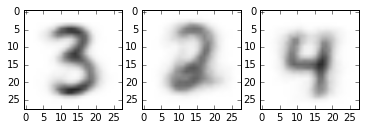

Iteration: 4, likelihood -144340.8285


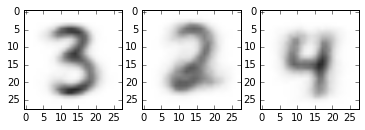

Iteration: 5, likelihood -144129.8061


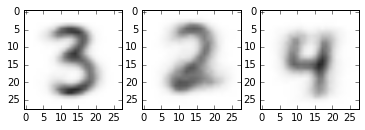

Iteration: 6, likelihood -144087.8576


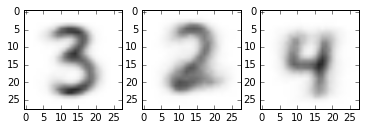

Iteration: 7, likelihood -144078.0926


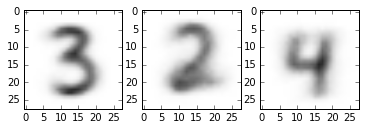

Iteration: 8, likelihood -144051.6615


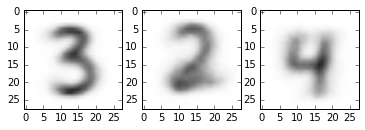

Iteration: 9, likelihood -144048.4911


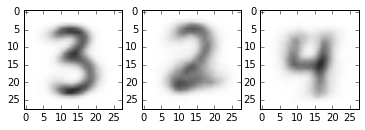

Iteration: 10, likelihood -144048.2482


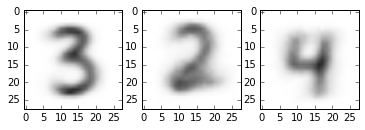

Iteration: 11, likelihood -144035.3920


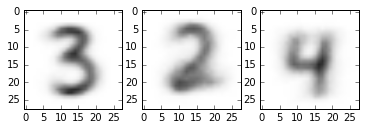

Iteration: 12, likelihood -144029.4398


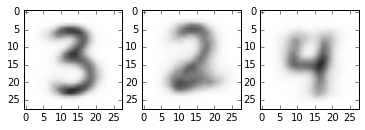

Iteration: 13, likelihood -144029.4026


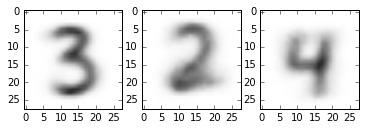

Iteration: 14, likelihood -144028.1130


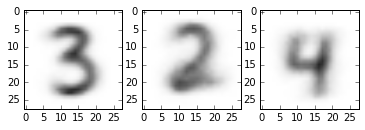

Iteration: 15, likelihood -144022.3604


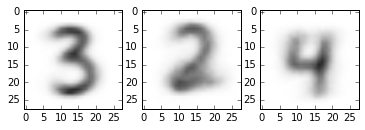

Iteration: 16, likelihood -144021.9972


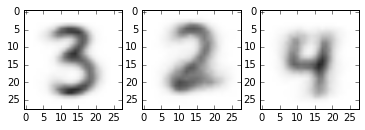

Iteration: 17, likelihood -144021.9920


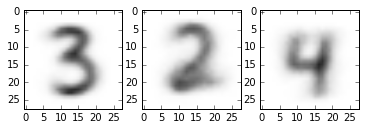

Iteration: 18, likelihood -144021.9916


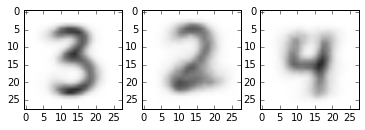

Iteration: 19, likelihood -144021.9915


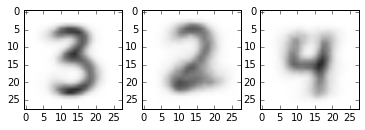

Iteration: 20, likelihood -144021.9915


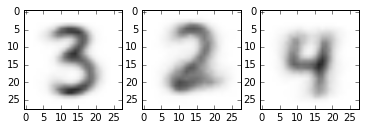

Iteration: 21, likelihood -144021.9915


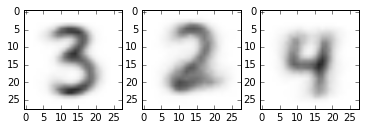

Iteration: 22, likelihood -144021.9915


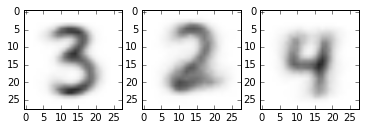

Iteration: 23, likelihood -144021.9915


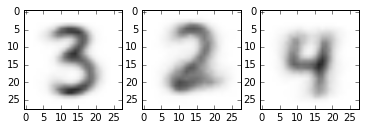

Iteration: 24, likelihood -144021.9914


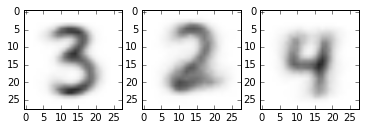

Iteration: 25, likelihood -144021.9914


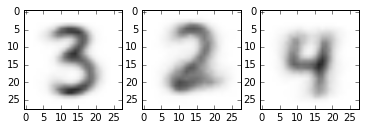

Iteration: 26, likelihood -144021.9914


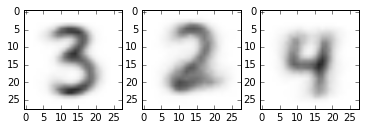

Iteration: 27, likelihood -144021.9864


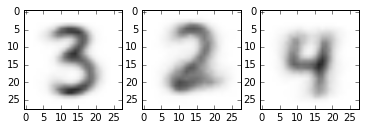

Iteration: 28, likelihood -144021.4239


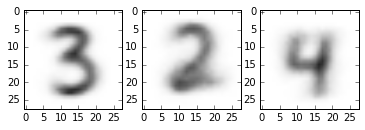

Iteration: 29, likelihood -144007.7527


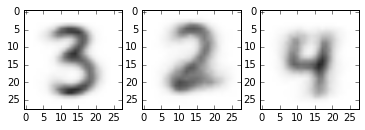

Iteration: 30, likelihood -143998.0675


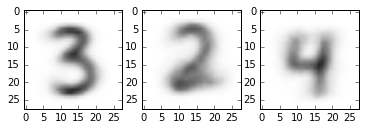

Iteration: 31, likelihood -143998.0501


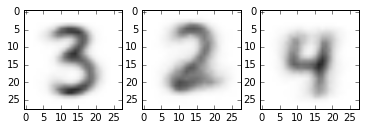

Iteration: 32, likelihood -143998.0348


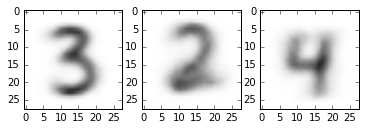

Iteration: 33, likelihood -143998.0195


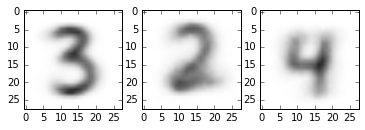

Iteration: 34, likelihood -143998.0044


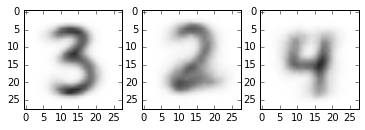

Iteration: 35, likelihood -143997.9904


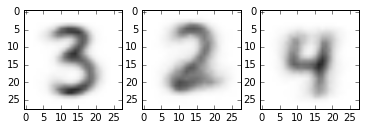

Iteration: 36, likelihood -143997.9786


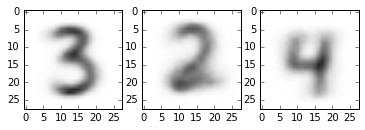

Iteration: 37, likelihood -143997.9700


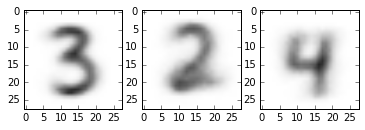

Iteration: 38, likelihood -143997.9646


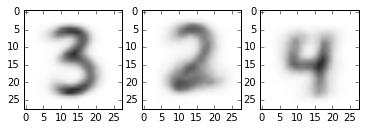

Iteration: 39, likelihood -143997.9615


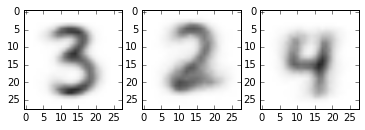

(array([[ 0.36124481],
        [ 0.31844331],
        [ 0.32031188]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

In [48]:
EM(X, K=3, max_iter=40, tol=1e-8)

Iteration: 0, likelihood -157398.7319


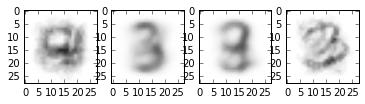

Iteration: 1, likelihood -150541.0908


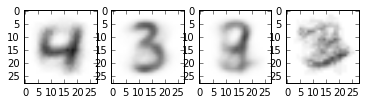

Iteration: 2, likelihood -147657.7129


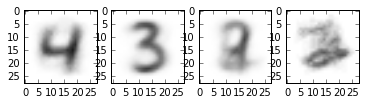

Iteration: 3, likelihood -146743.2637


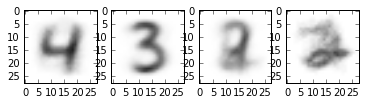

Iteration: 4, likelihood -146107.8873


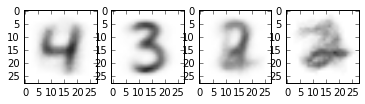

Iteration: 5, likelihood -145277.0318


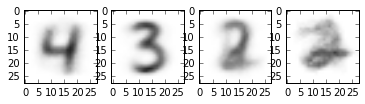

Iteration: 6, likelihood -144569.3990


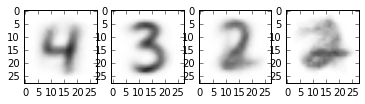

Iteration: 7, likelihood -143835.3970


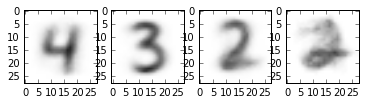

Iteration: 8, likelihood -143536.1498


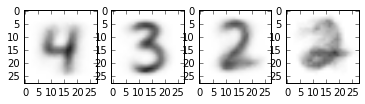

Iteration: 9, likelihood -143419.5692


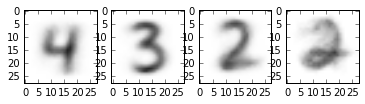

Iteration: 10, likelihood -143348.0477


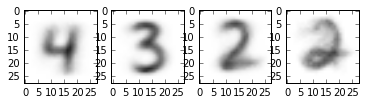

Iteration: 11, likelihood -143318.9863


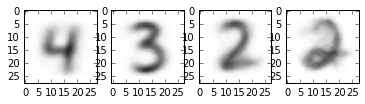

Iteration: 12, likelihood -143309.3948


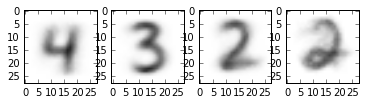

Iteration: 13, likelihood -143292.8699


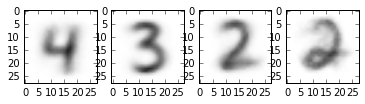

Iteration: 14, likelihood -143275.5179


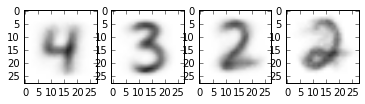

Iteration: 15, likelihood -143240.8371


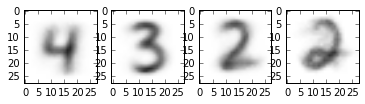

Iteration: 16, likelihood -143210.7832


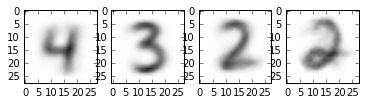

Iteration: 17, likelihood -143190.5670


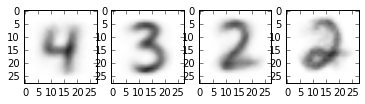

Iteration: 18, likelihood -143164.6571


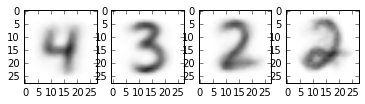

Iteration: 19, likelihood -143156.4555


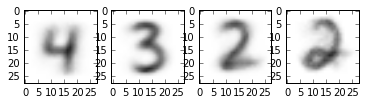

Iteration: 20, likelihood -143152.9183


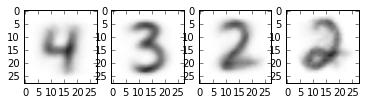

Iteration: 21, likelihood -143151.9930


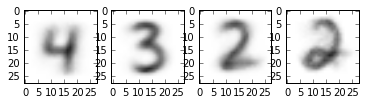

Iteration: 22, likelihood -143150.4877


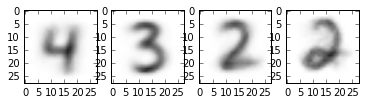

Iteration: 23, likelihood -143150.3517


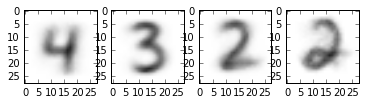

Iteration: 24, likelihood -143150.3362


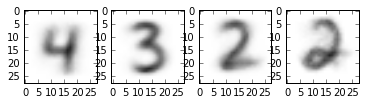

Iteration: 25, likelihood -143150.3104


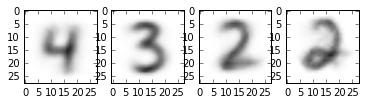

Iteration: 26, likelihood -143150.2473


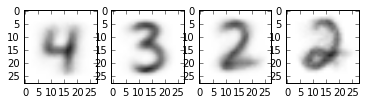

Iteration: 27, likelihood -143150.0817


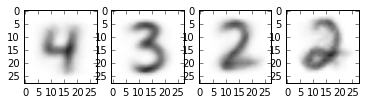

Iteration: 28, likelihood -143149.7674


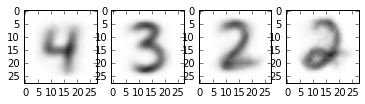

Iteration: 29, likelihood -143149.4462


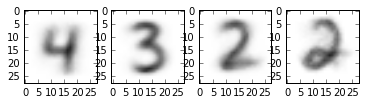

Iteration: 30, likelihood -143148.9766


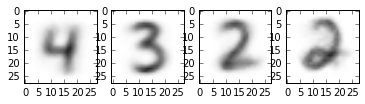

Iteration: 31, likelihood -143148.3574


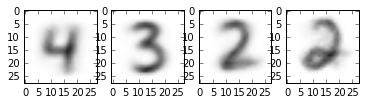

Iteration: 32, likelihood -143148.0394


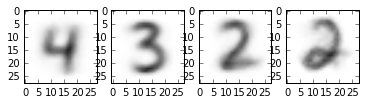

Iteration: 33, likelihood -143147.4331


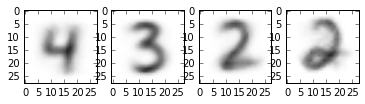

Iteration: 34, likelihood -143146.2787


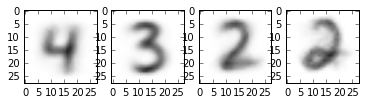

Iteration: 35, likelihood -143146.0069


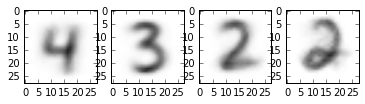

Iteration: 36, likelihood -143145.7506


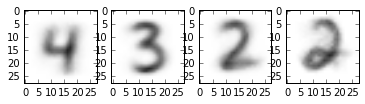

Iteration: 37, likelihood -143143.3257


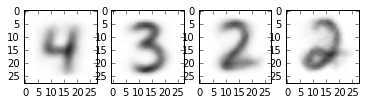

Iteration: 38, likelihood -143133.8922


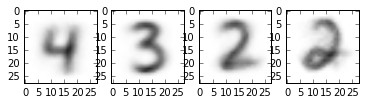

Iteration: 39, likelihood -143119.8172


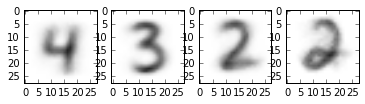

(array([[ 0.30639713],
        [ 0.38224405],
        [ 0.23146227],
        [ 0.07989655]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

In [51]:
EM(X, K=4, max_iter=40)

In [52]:
with open('a012_labels.dat', 'rb') as fid:
    Z = np.fromfile(fid, np.uint8)

Iteration: 0, likelihood -156132.7673


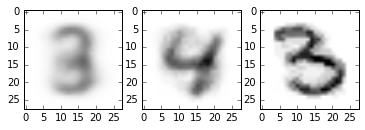

Iteration: 1, likelihood -151046.6756


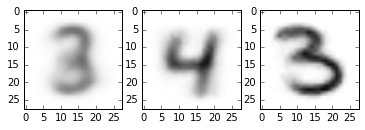

Iteration: 2, likelihood -149254.2928


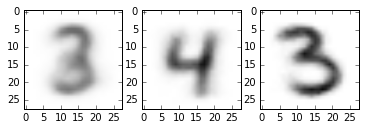

Iteration: 3, likelihood -148374.6178


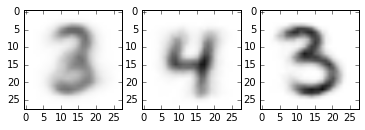

Iteration: 4, likelihood -147899.0248


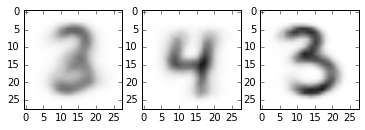

Iteration: 5, likelihood -147588.3075


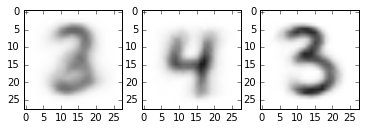

Iteration: 6, likelihood -147324.3338


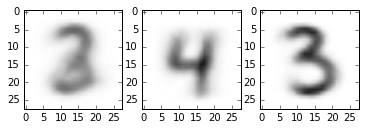

Iteration: 7, likelihood -146920.0262


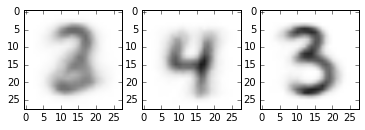

Iteration: 8, likelihood -146824.3135


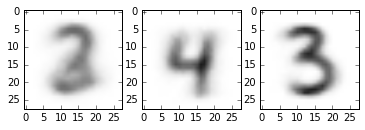

Iteration: 9, likelihood -146591.3050


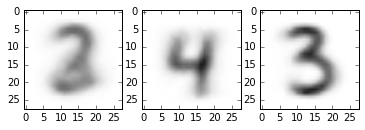

Iteration: 10, likelihood -146437.0761


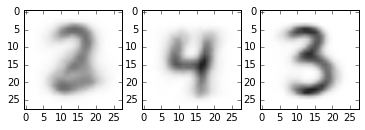

Iteration: 11, likelihood -146403.9560


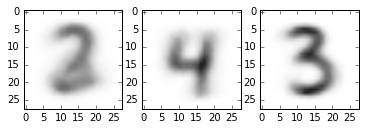

Iteration: 12, likelihood -146393.8660


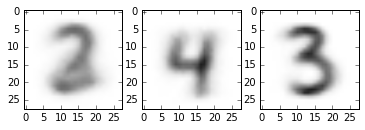

Iteration: 13, likelihood -146336.4733


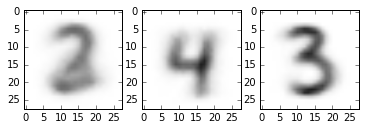

Iteration: 14, likelihood -146179.9493


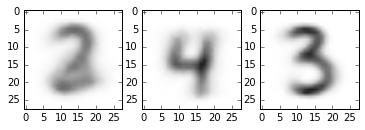

Iteration: 15, likelihood -146161.7498


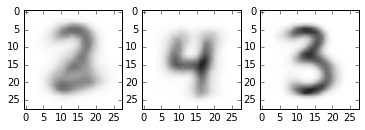

Iteration: 16, likelihood -146156.5126


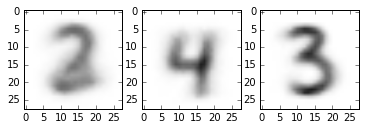

Iteration: 17, likelihood -146155.1231


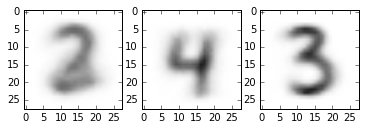

Iteration: 18, likelihood -146154.0502


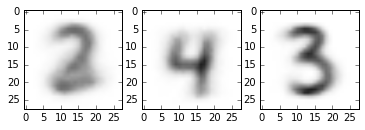

Iteration: 19, likelihood -146116.0482


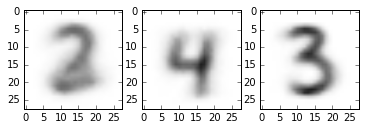

Iteration: 20, likelihood -146091.6417


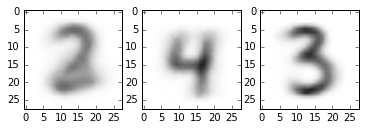

Iteration: 21, likelihood -146090.4006


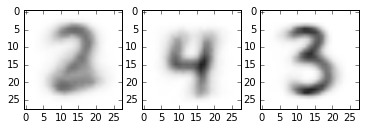

Iteration: 22, likelihood -146089.6245


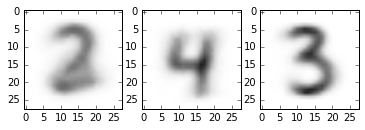

Iteration: 23, likelihood -146088.8363


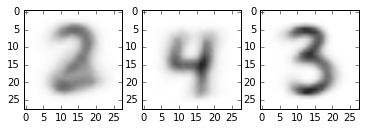

Iteration: 24, likelihood -146088.4339


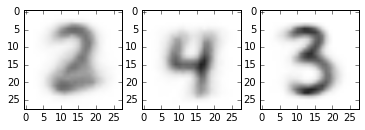

Iteration: 25, likelihood -146087.4639


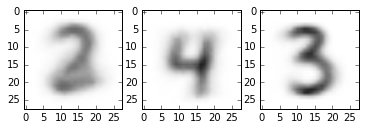

Iteration: 26, likelihood -146076.2182


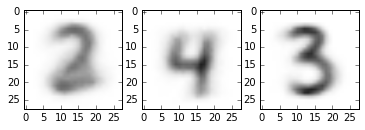

Iteration: 27, likelihood -146067.6725


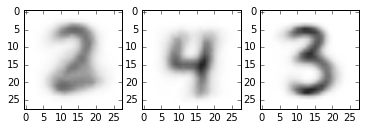

Iteration: 28, likelihood -146066.7901


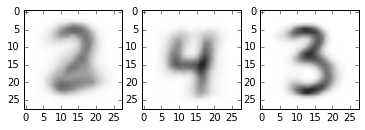

Iteration: 29, likelihood -146066.7900


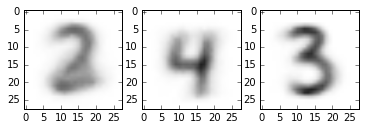

Iteration: 30, likelihood -146066.7900


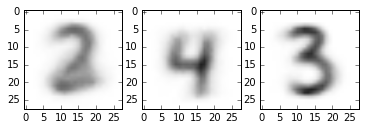

Iteration: 31, likelihood -146066.7900


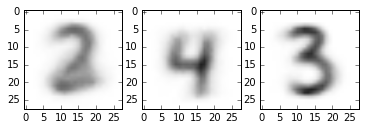

Iteration: 32, likelihood -146066.7900


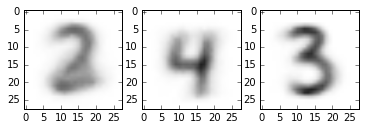

Iteration: 33, likelihood -146066.7900


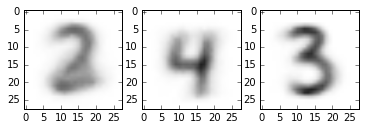

Iteration: 34, likelihood -146066.7900


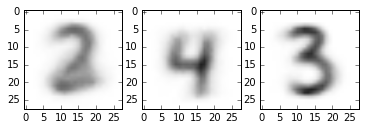

In [54]:
K = 3
pis, mus = EM(X, K=3, max_iter=40, tol=1e-8)

In [56]:
probs = np.zeros((K, N)) # responsibilities
for k in range(K):
    probs[k] = pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
probs /= probs.sum(axis=0)

comp = probs.argmax(axis=0)

In [61]:
miss2 = np.logical_and(comp != 0, Z == 2)
miss3 = np.logical_and(comp != 2, Z == 3)
miss4 = np.logical_and(comp != 1, Z == 4)

(784,)


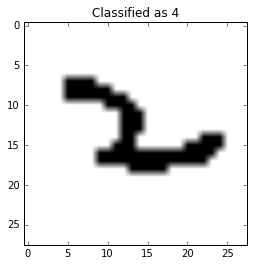

(784,)


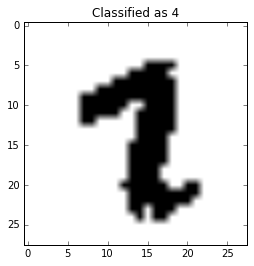

(784,)


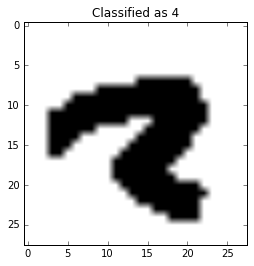

In [71]:
for i in np.flatnonzero(miss2):
    plt.title('Classified as %d' % (4 if comp[i] == 1 else 3))
    plot_digit(X[i])

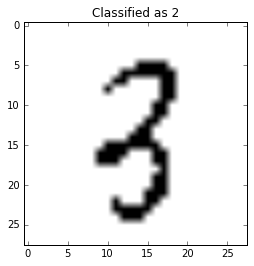

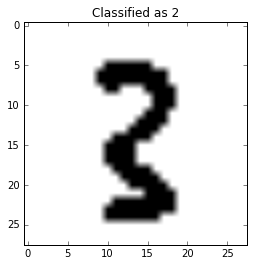

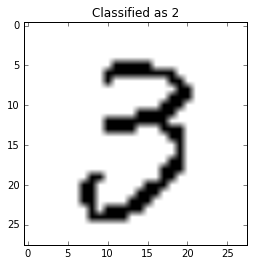

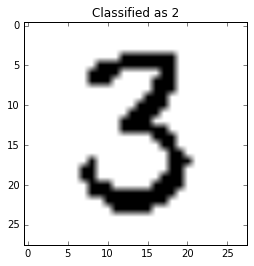

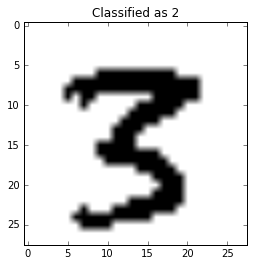

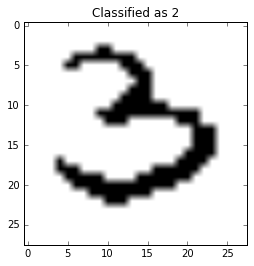

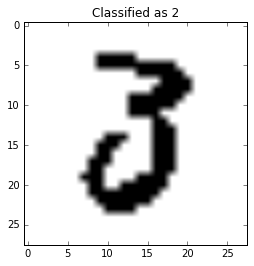

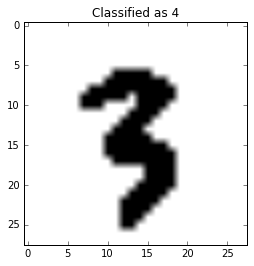

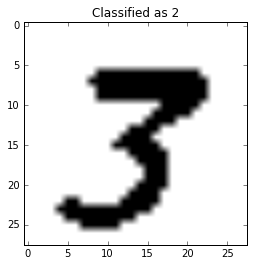

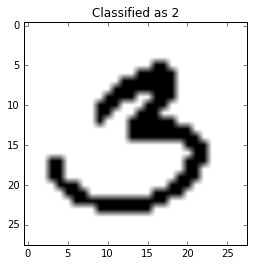

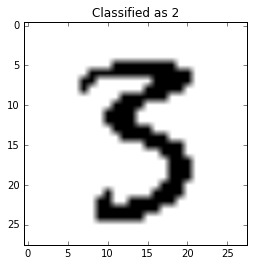

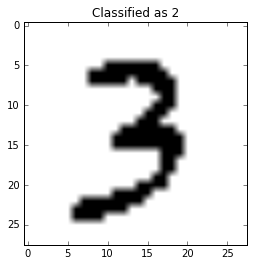

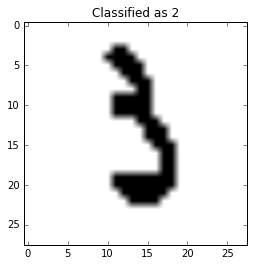

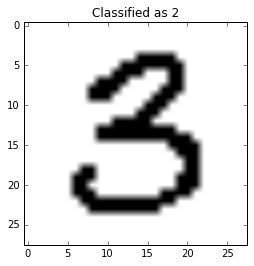

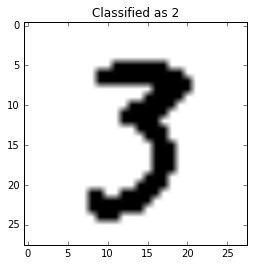

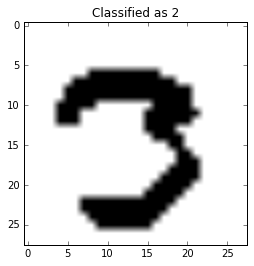

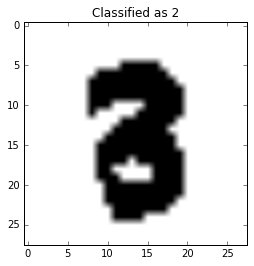

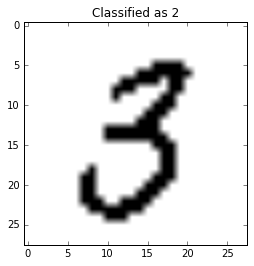

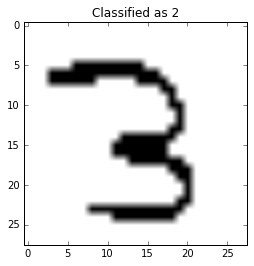

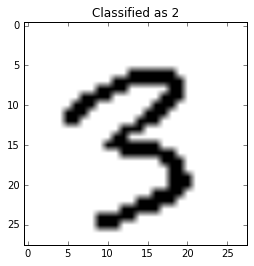

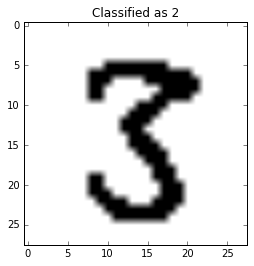

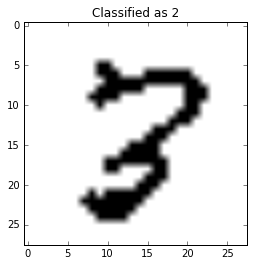

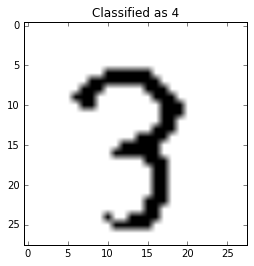

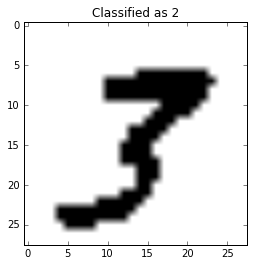

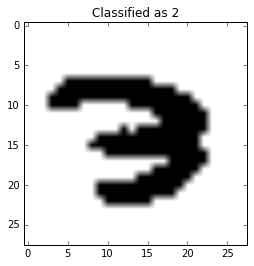

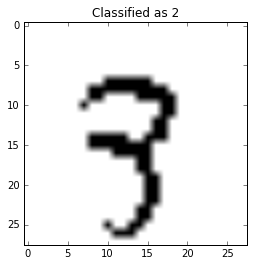

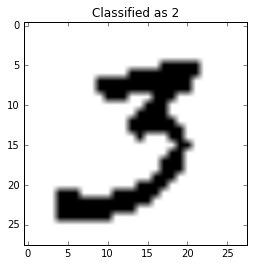

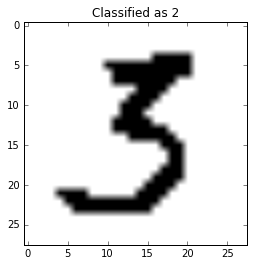

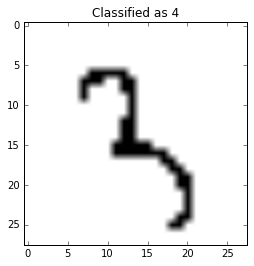

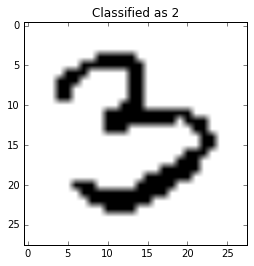

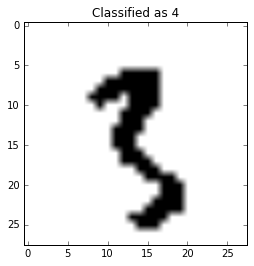

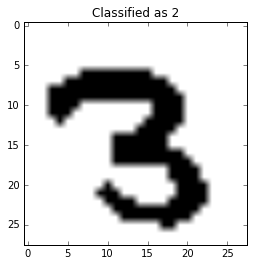

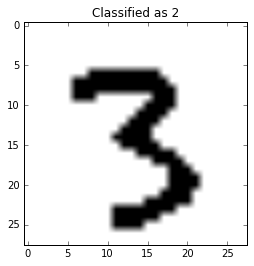

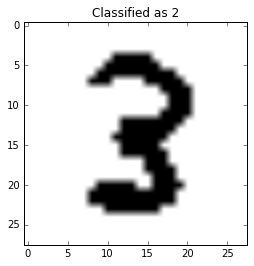

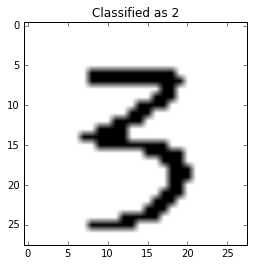

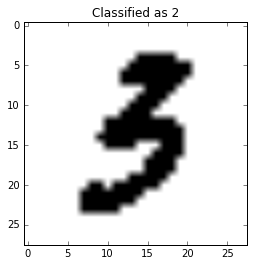

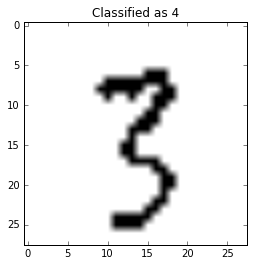

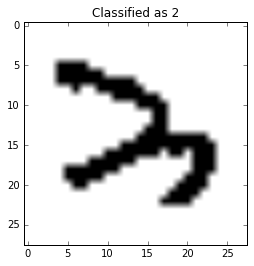

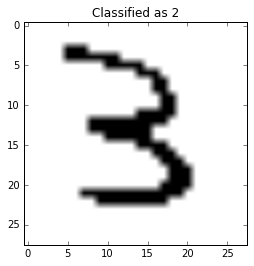

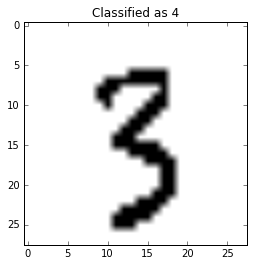

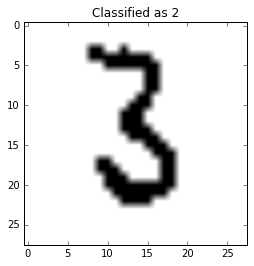

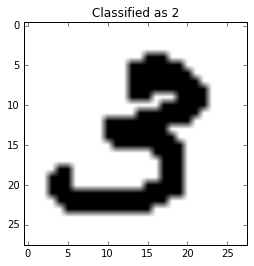

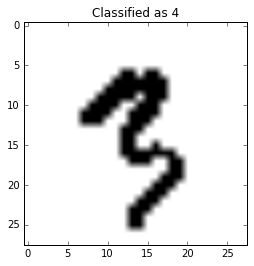

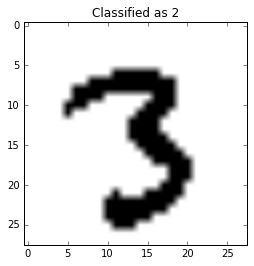

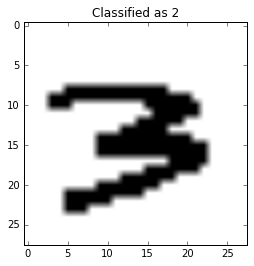

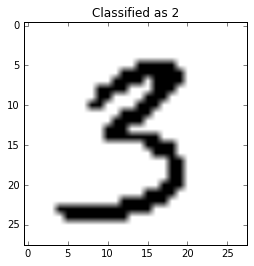

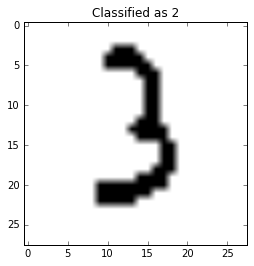

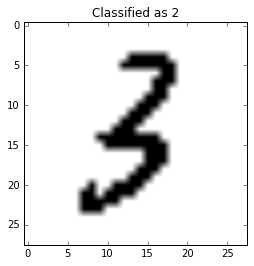

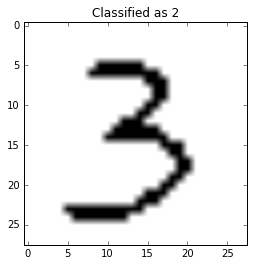

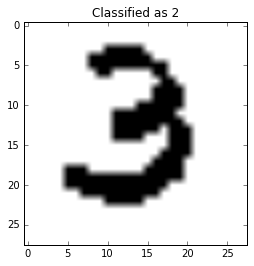

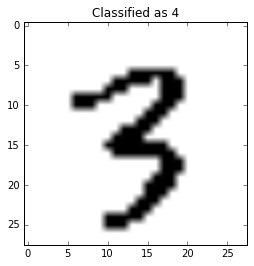

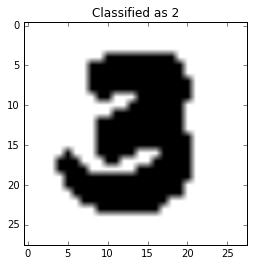

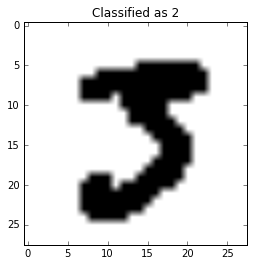

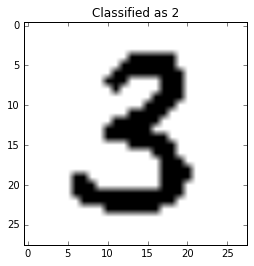

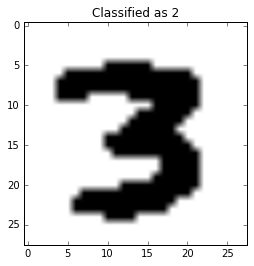

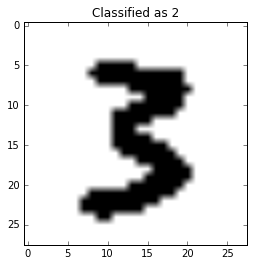

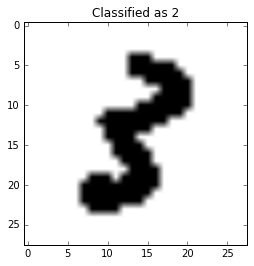

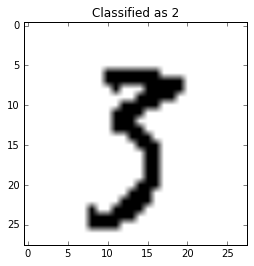

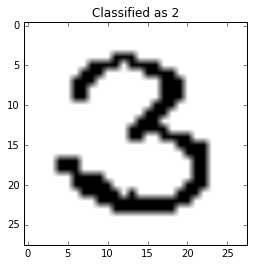

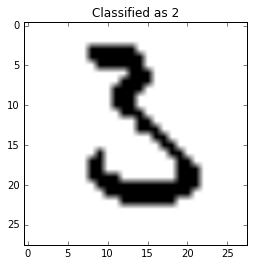

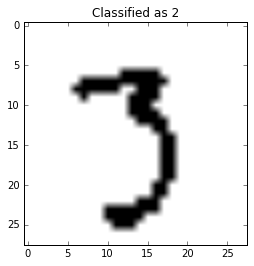

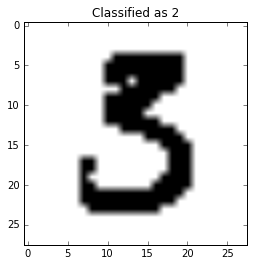

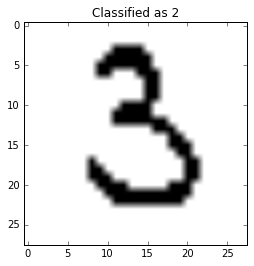

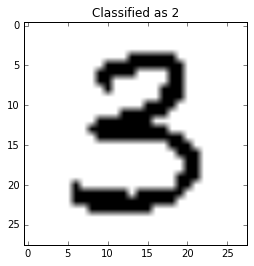

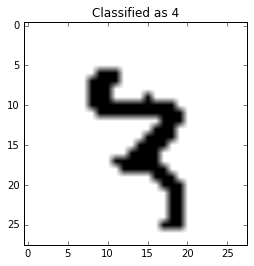

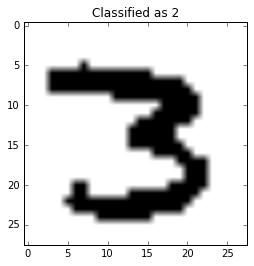

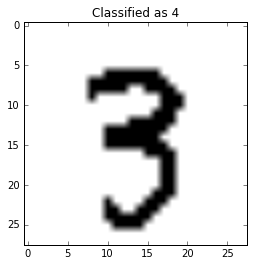

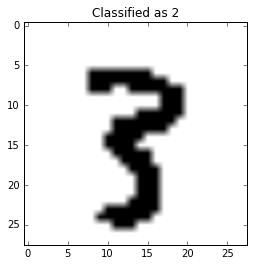

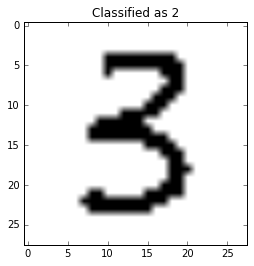

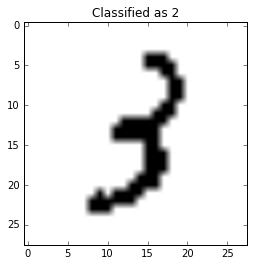

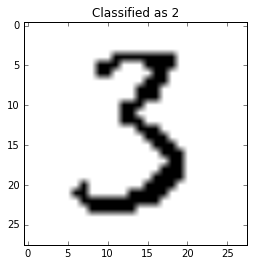

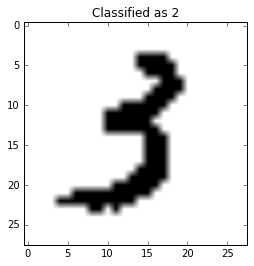

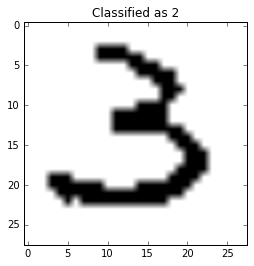

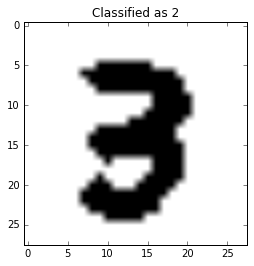

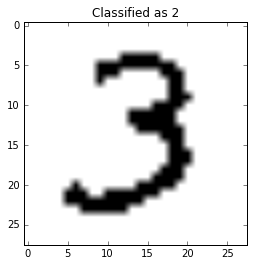

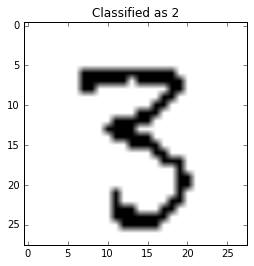

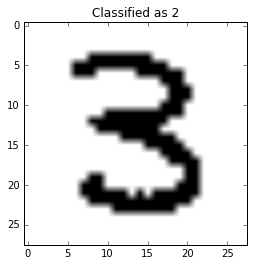

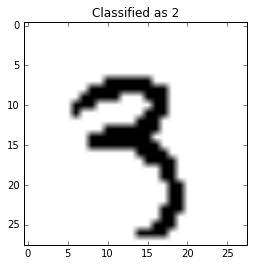

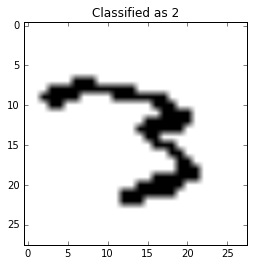

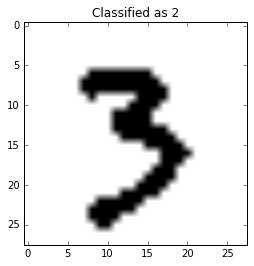

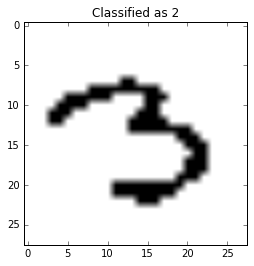

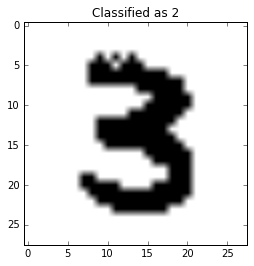

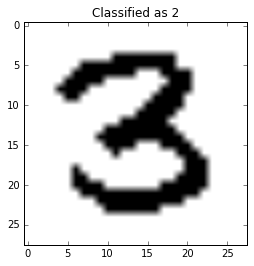

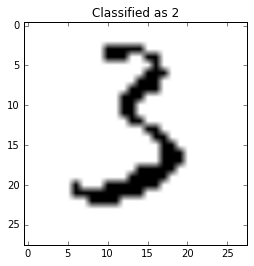

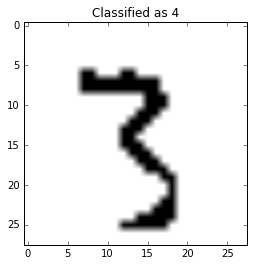

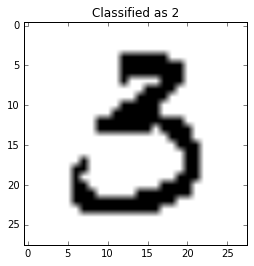

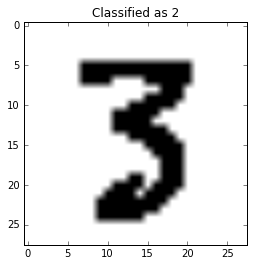

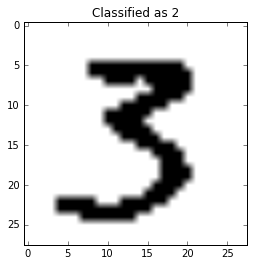

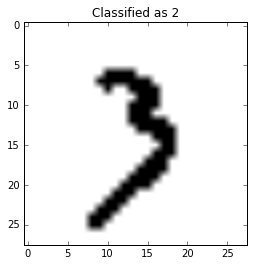

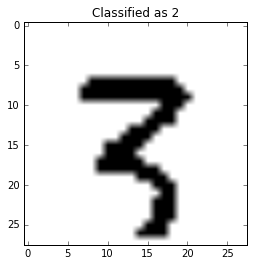

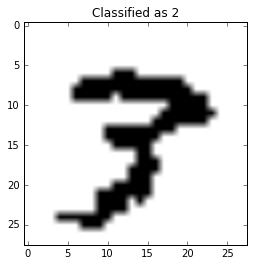

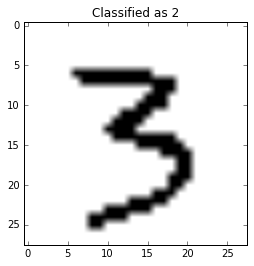

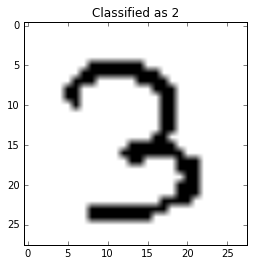

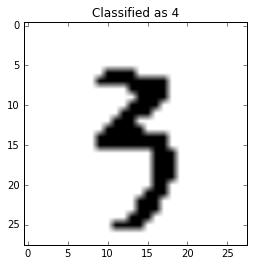

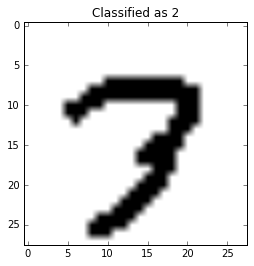

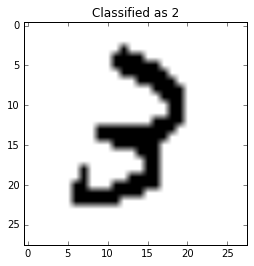

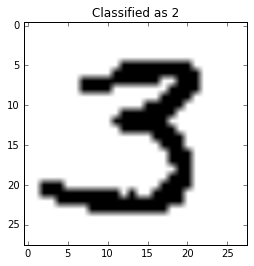

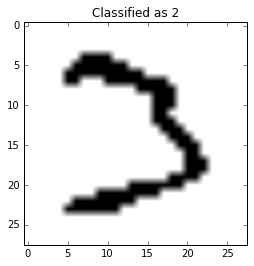

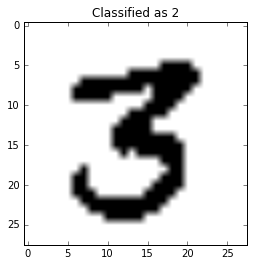

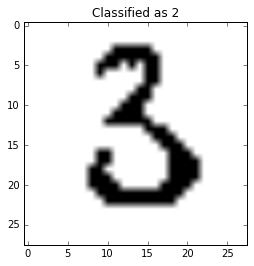

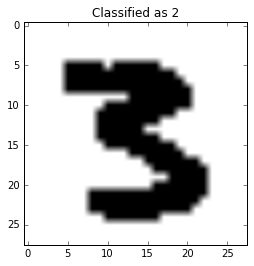

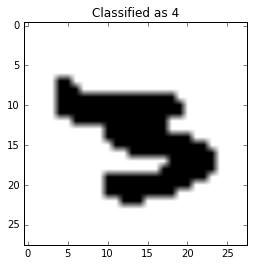

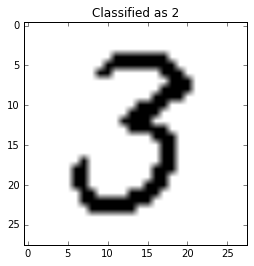

In [72]:
for i in np.flatnonzero(miss3):
    plt.title('Classified as %d' % (2 if comp[i] == 0 else 4))
    plot_digit(X[i])

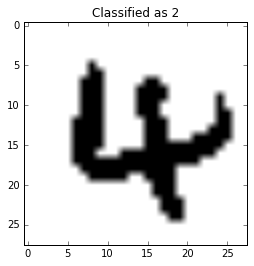

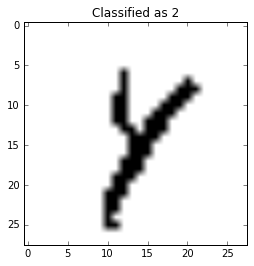

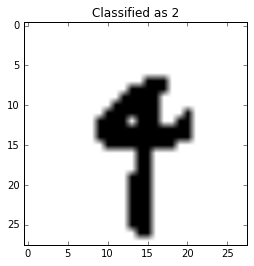

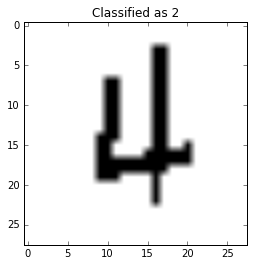

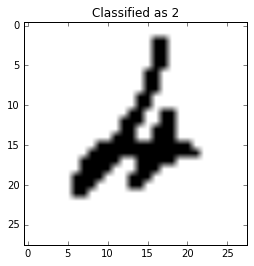

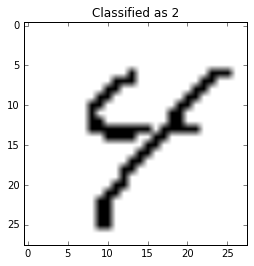

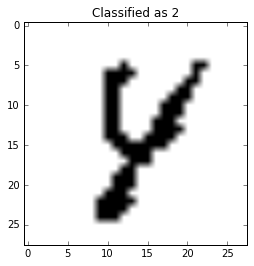

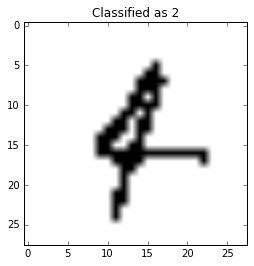

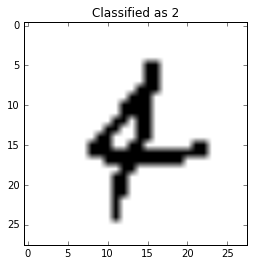

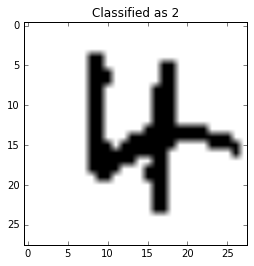

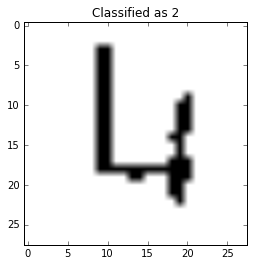

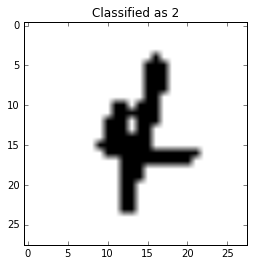

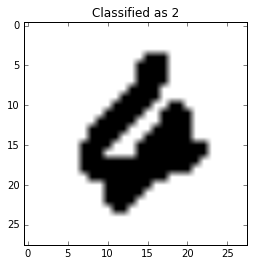

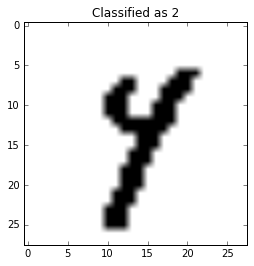

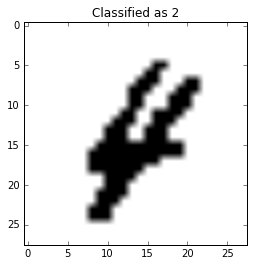

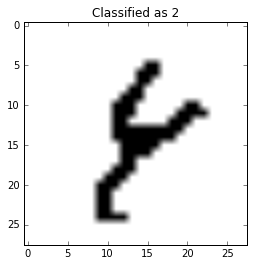

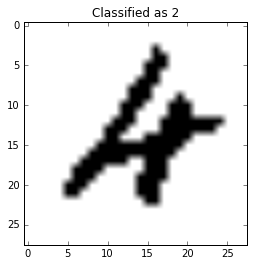

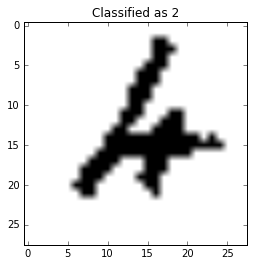

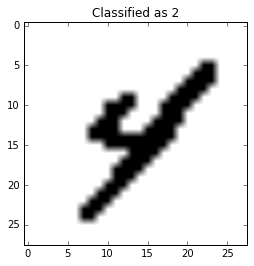

In [73]:
for i in np.flatnonzero(miss4):
    plt.title('Classified as %d' % (2 if comp[i] == 0 else 3))
    plot_digit(X[i])

In [75]:
miss2.sum(), miss3.sum(), miss4.sum()

(3, 103, 19)

In [76]:
Z

array([2, 3, 3, 3, 4, 4, 3, 2, 4, 2, 4, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 4, 3,
       4, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 4, 4, 3, 3, 2, 3, 2, 4, 3, 4,
       4, 3, 3, 2, 4, 4, 3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 4, 4, 2, 3, 4, 3, 3,
       4, 3, 2, 4, 4, 4, 2, 3, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 2, 3, 2,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 3, 2, 2, 2, 4, 3, 2, 4,
       3, 2, 3, 3, 4, 2, 2, 2, 3, 4, 2, 3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3,
       3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 2, 3, 2, 2, 3, 4, 4, 3, 4, 4, 3, 3, 3,
       3, 3, 2, 4, 2, 2, 2, 4, 4, 2, 3, 2, 2, 3, 3, 2, 4, 3, 4, 4, 4, 4, 3,
       2, 2, 2, 4, 4, 4, 2, 2, 3, 2, 4, 2, 3, 3, 2, 2, 4, 2, 4, 3, 3, 3, 4,
       2, 4, 3, 4, 3, 3, 4, 4, 2, 4, 3, 3, 3, 4, 4, 4, 3, 4, 2, 3, 4, 4, 4,
       4, 4, 2, 3, 3, 4, 3, 2, 4, 4, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       4, 2, 3, 3, 3, 3, 3, 4, 4, 4, 3, 2, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 4, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 3, 2, 4, 2, 3, 2, 2, 2,
       4, 4,

In [93]:
from numpy.core.umath_tests import matrix_multiply as mm

def EM(X, K=3, max_iter=100, tol=0.01):
    # Initialize variables
    N, D = X.shape
    pis = np.ones(K) / K
    mus = np.vstack((np.mean(X[Z==2], axis=0),
                     np.mean(X[Z==3], axis=0),
                     np.mean(X[Z==4], axis=0)))
    print(mus.shape)
    
    prev_llh = 0
    for i in range(max_iter):
        # E step
        resps = np.zeros((K, N)) # responsibilities
        for k in range(K):
            resps[k] = pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
        resps /= resps.sum(axis=0)
        
        # M step
        Nks = resps.sum(axis=1)[:, np.newaxis]
        mus = np.dot(resps, X) / Nks # Calculate new mus
        pis = Nks / N
        
        # Evaluate log likelihood
        llh = 0
        for k in range(K):
            llh += pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
        llh = np.log(llh).sum()
        print('Iteration: %d, likelihood %.4f' % (i, llh))
        
        # Plot the means
        _, axs = plt.subplots(1, K)
        for mu, ax in zip(mus, axs):
            ax.imshow(mu.reshape(28, 28).T, cmap=plt.cm.Greys, vmin=0, vmax=1)
        
        if np.abs(llh - prev_llh) < tol:
            # Break if the log-likelihood hasn't improved much
            plt.savefig('means.png', bbox_inches='tight', dpi=300)
            break
        prev_llh = llh
        plt.show()
    
    return pis, mus

(3, 784)
Iteration: 0, likelihood -144002.6731


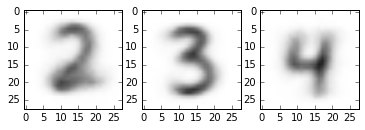

Iteration: 1, likelihood -143984.2890


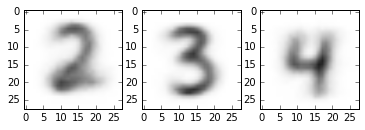

Iteration: 2, likelihood -143978.0819


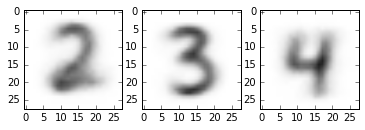

Iteration: 3, likelihood -143976.6186


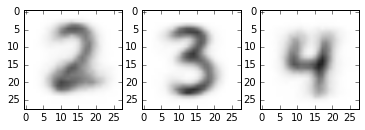

Iteration: 4, likelihood -143976.2568


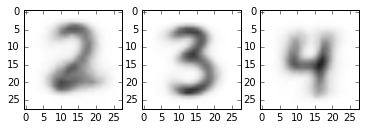

Iteration: 5, likelihood -143976.2546


(array([[ 0.31284435],
        [ 0.38611479],
        [ 0.30104086]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

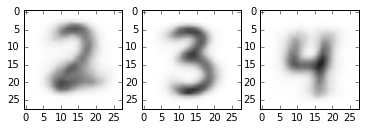

In [94]:
EM(X)

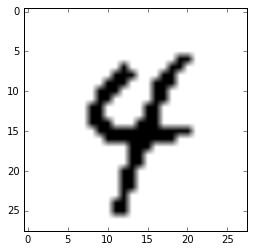

In [86]:
plot_digit(X[4])

In [128]:
from scipy.misc import imread
mydigit = 1 - (imread('mydigit.png', flatten=True).T.reshape(1, D) / 255).astype(np.uint8)

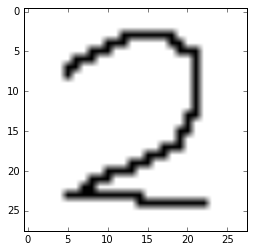

In [129]:
plot_digit(mydigit)

In [131]:
probs = np.zeros((K, 1)) # responsibilities
for k in range(K):
    probs[k] = pis[k] * np.prod(mus[k]**mydigit * (1-mus[k])**(1-mydigit), axis=1)
probs /= probs.sum(axis=0)

comp = probs.argmax(axis=0)

In [132]:
comp

array([0], dtype=int64)

In [133]:
probs

array([[ 1.],
       [ 0.],
       [ 0.]])

In [130]:
mydigit

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 